# Sort Algorithms Analysis

This notebook analyzes the performance of different sorting algorithms:
1. Selection Sort
2. Bubble Sort
3. Insertion Sort (Shifting)
4. Insertion Sort (Exchange)

We'll analyze:
- Time complexity
- Space complexity
- Number of comparisons
- Performance across different data types (random vs sorted vs reversed)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Add parent directory to path for importing complexity package
sys.path.append(str(Path.cwd().parent))

from complexity.analyser import (
    ComplexityAnalyzer,
    ConstantComplexity,
    LogarithmicComplexity,
    LinearComplexity,
    LinearLogComplexity,
    QuadraticComplexity
)
from complexity.visualizer import ComplexityVisualizer

# Set up plotting style
sns.set_theme()
sns.set_palette('husl')

In [4]:
# Load the data
raw_df = pd.read_csv('../sort_extended_results_raw.csv')
grouped_df = pd.read_csv('../sort_extended_results_grouped.csv')

print("Raw data shape:", raw_df.shape)
print("\nGrouped data shape:", grouped_df.shape)
print("\nAvailable algorithms:", grouped_df['algorithm'].unique())
print("Available data types:", grouped_df['data_type'].unique())

Raw data shape: (54, 10)

Grouped data shape: (18, 7)

Available algorithms: ['merge_sort' 'selection_sort']
Available data types: ['inverse_sorted' 'random' 'sorted']



Analyzing algorithmic complexity...


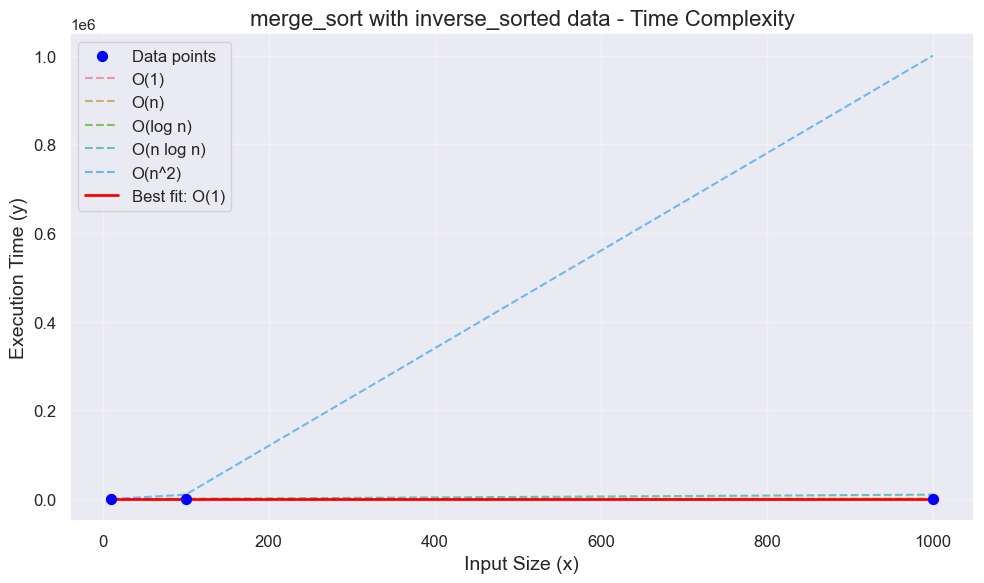

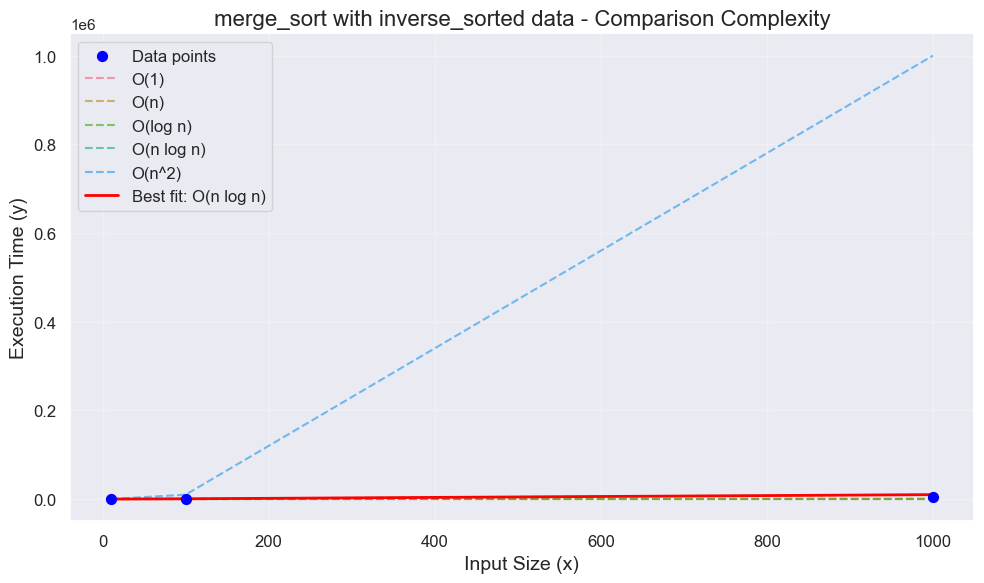


merge_sort with inverse_sorted data:
Time Complexity: O(1)
Comparison Complexity: O(n log n)


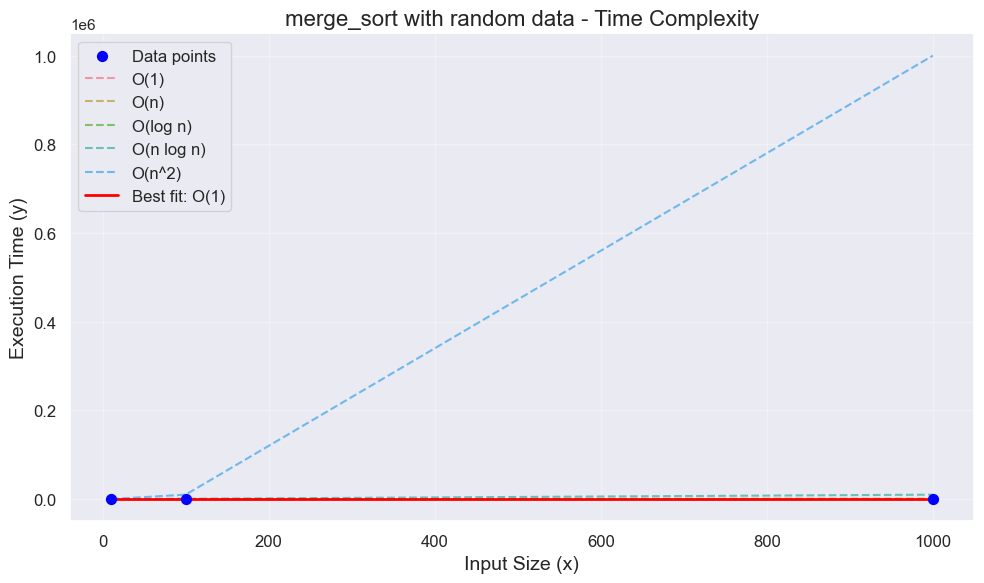

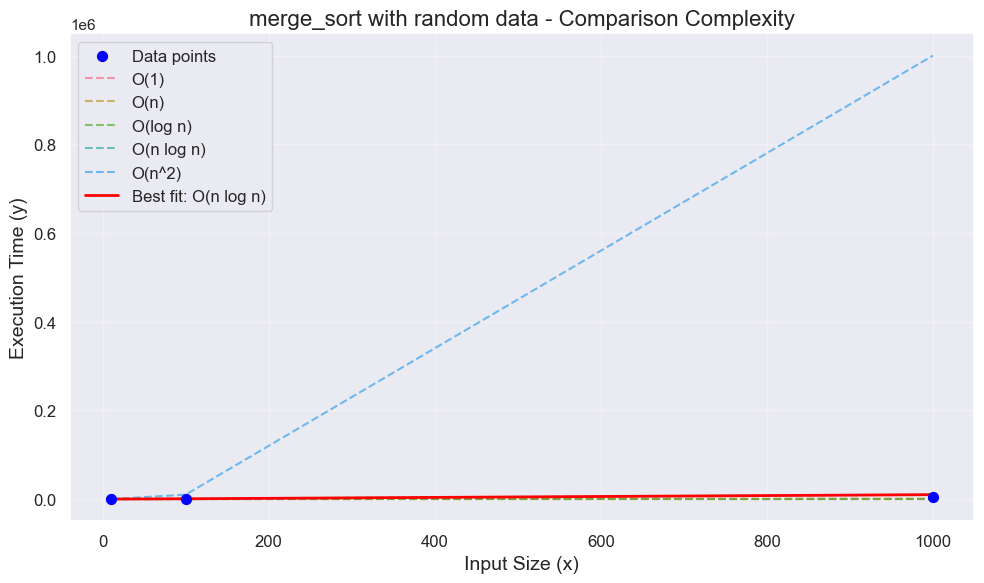


merge_sort with random data:
Time Complexity: O(1)
Comparison Complexity: O(n log n)


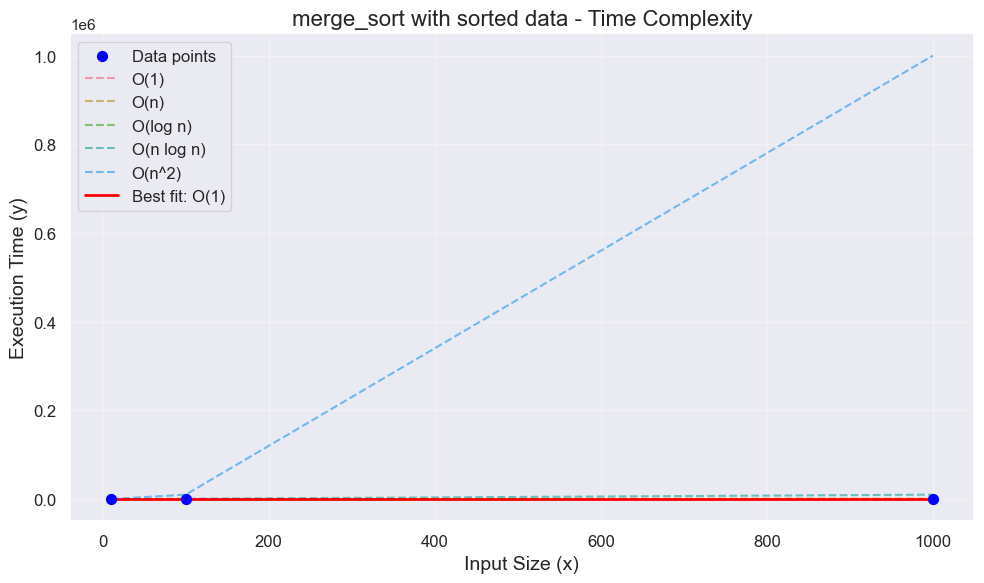

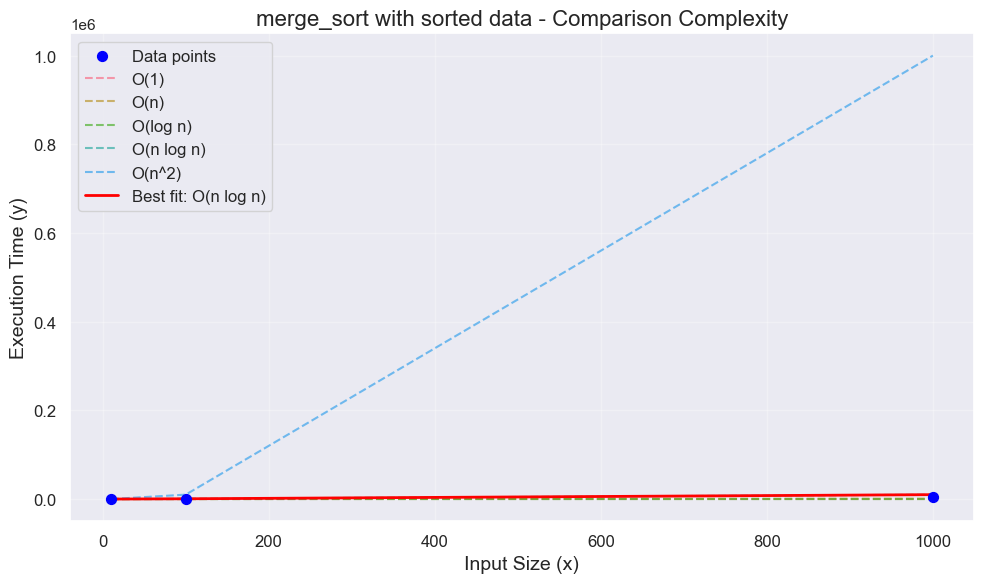


merge_sort with sorted data:
Time Complexity: O(1)
Comparison Complexity: O(n log n)


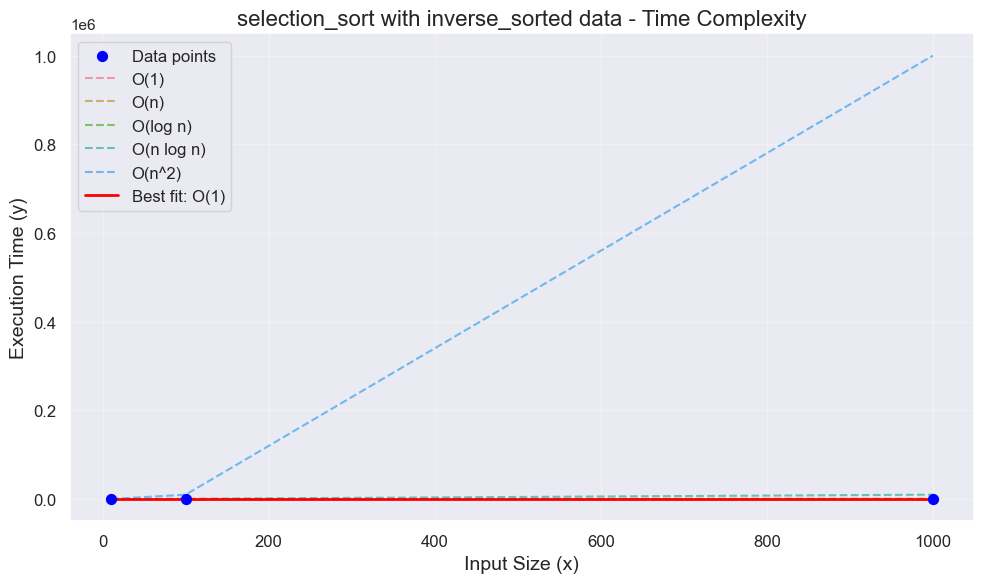

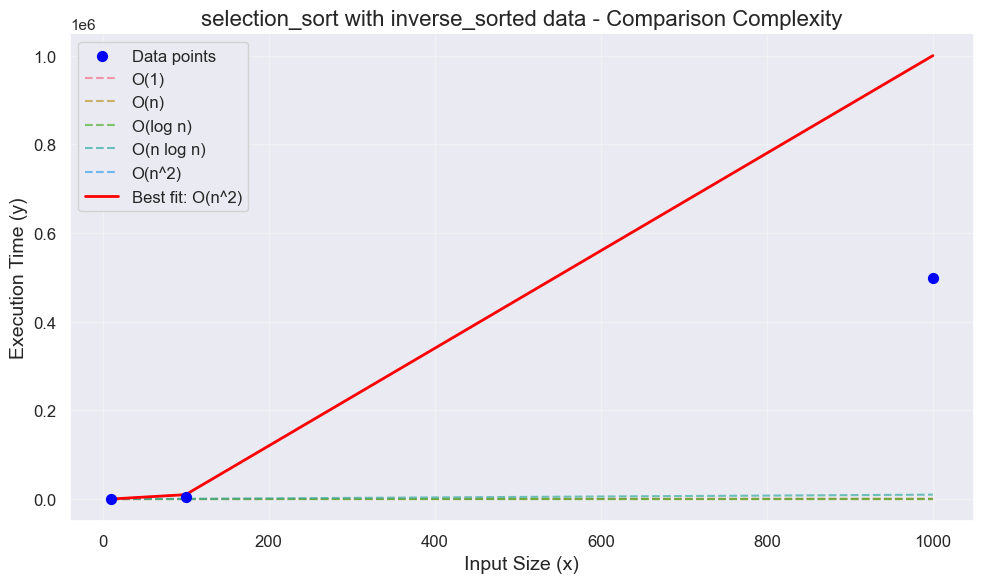


selection_sort with inverse_sorted data:
Time Complexity: O(1)
Comparison Complexity: O(n^2)


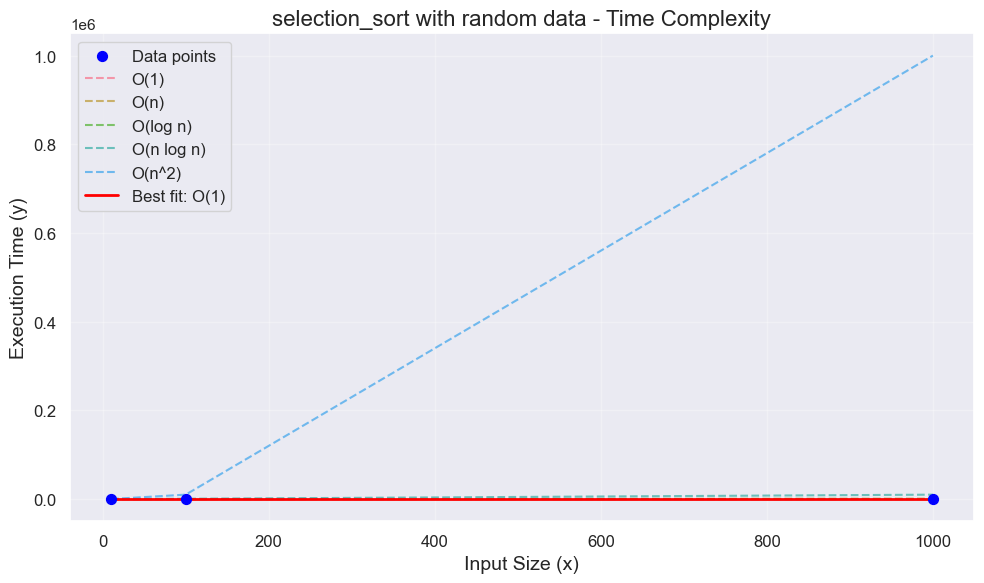

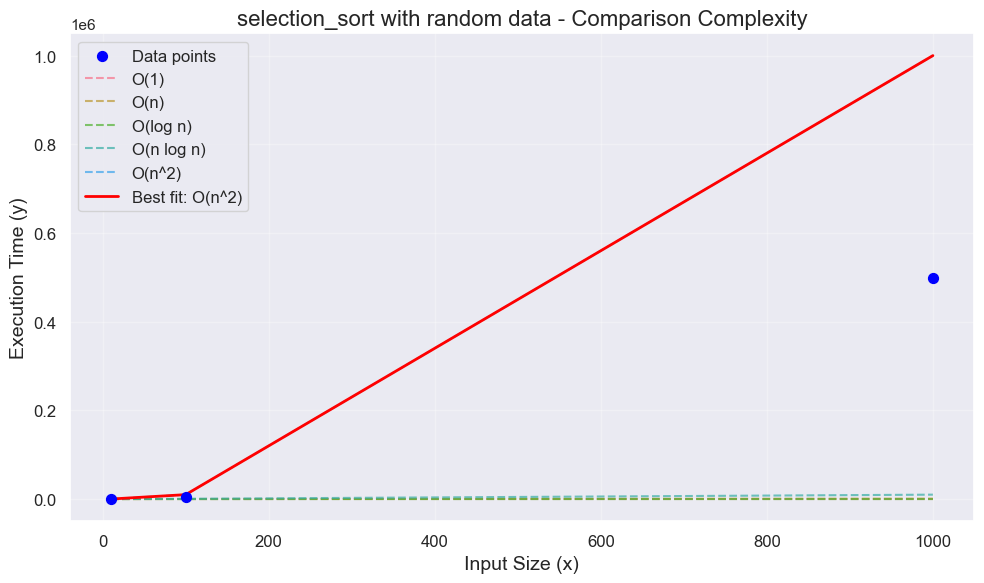


selection_sort with random data:
Time Complexity: O(1)
Comparison Complexity: O(n^2)


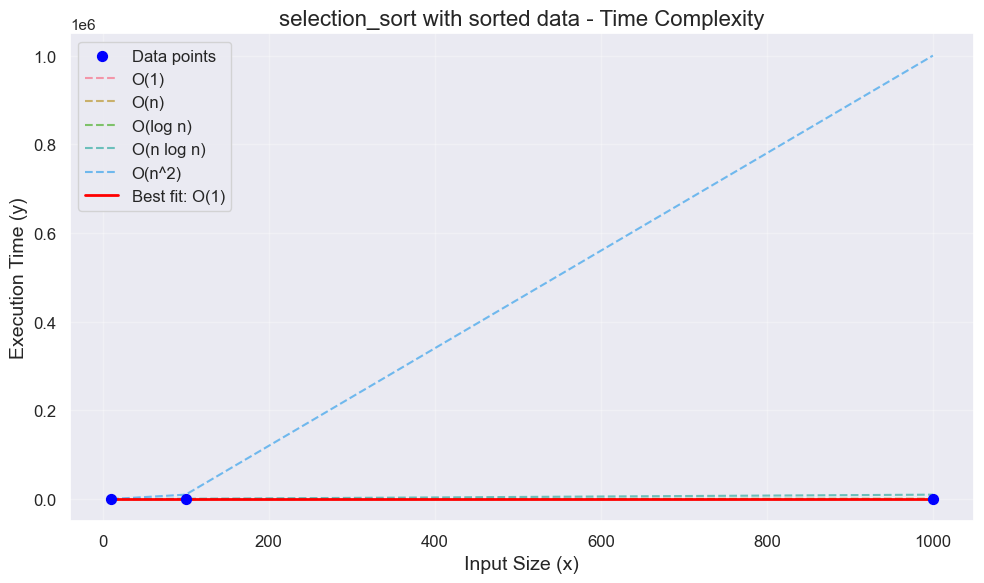

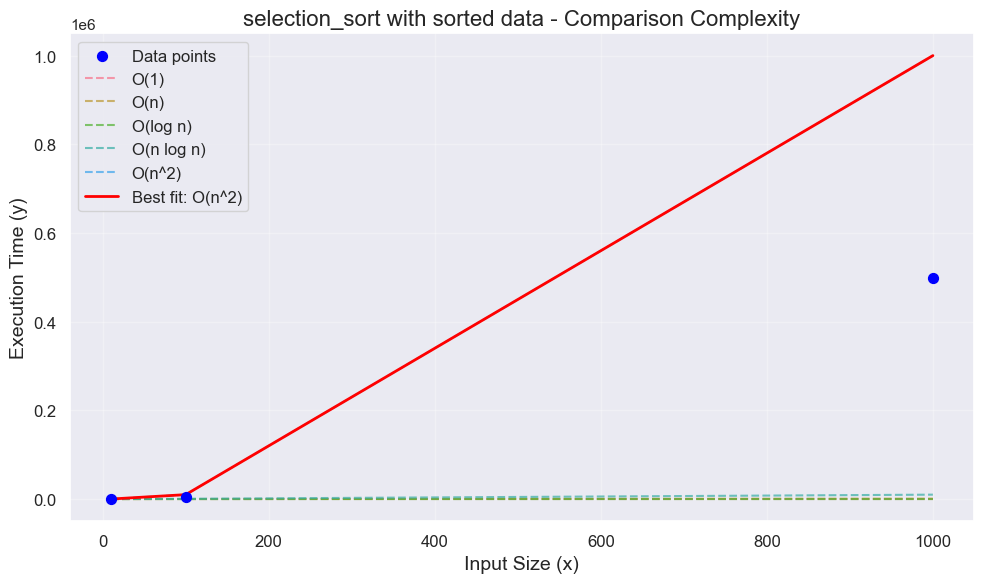


selection_sort with sorted data:
Time Complexity: O(1)
Comparison Complexity: O(n^2)


In [5]:
# Create analyzer with specific complexity functions
complexity_functions = [
    ConstantComplexity(),
    LinearComplexity(),
    LogarithmicComplexity(),
    LinearLogComplexity(),
    QuadraticComplexity()
]
analyzer = ComplexityAnalyzer(complexity_functions)

# Analyze complexity for each algorithm and data type combination
print("\nAnalyzing algorithmic complexity...")

for algo_name in grouped_df['algorithm'].unique():
    for data_type in grouped_df[grouped_df['algorithm'] == algo_name]['data_type'].unique():
        # Get data for this algorithm and data type
        data = grouped_df[
            (grouped_df['algorithm'] == algo_name) & 
            (grouped_df['data_type'] == data_type)
        ]
        
        # Get sizes and measurements
        x = data['size'].values
        time_y = data['time'].values
        comp_y = data['comparison_count'].values
        
        # Create visualizers
        time_visualizer = ComplexityVisualizer(x, time_y, complexity_functions)
        comp_visualizer = ComplexityVisualizer(x, comp_y, complexity_functions)
        
        # Get complexity classes
        time_complexity, _ = analyzer.get_best_fit(x, time_y)
        comp_complexity, _ = analyzer.get_best_fit(x, comp_y)
        
        # Plot the results
        time_visualizer.plot(
            time_complexity,
            title=f"{algo_name} with {data_type} data - Time Complexity"
        )
        
        comp_visualizer.plot(
            comp_complexity,
            title=f"{algo_name} with {data_type} data - Comparison Complexity"
        )
        
        print(f"\n{algo_name} with {data_type} data:")
        print(f"Time Complexity: {time_complexity}")
        print(f"Comparison Complexity: {comp_complexity}")

## Analysis Summary

The plots above show:
1. The actual measured data points (blue dots)
2. The theoretical complexity functions (dashed lines)
3. The best-fitting complexity function (solid red line)

For each algorithm and data type combination, we can see:
- The empirical time complexity
- The empirical comparison complexity
- How well the theoretical complexity matches the actual measurements